<a href="https://colab.research.google.com/github/NarenneraN/TimeSeries/blob/main/06_DeTrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


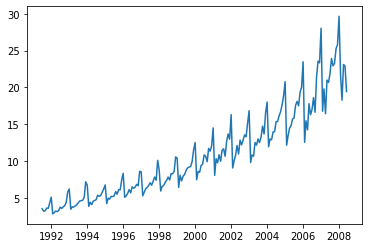

In [4]:
plt.plot(df)

In [6]:
df.reset_index(inplace=True)

1 .  Subtracting the line of best fit form time series

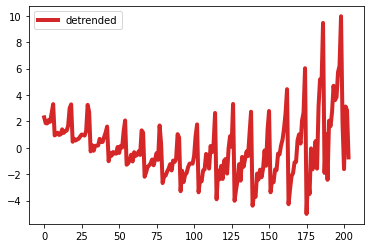

In [12]:
from scipy import signal
detrended=signal.detrend(df['value'])
plt.plot(detrended,color='tab:red',linewidth=4,label='detrended')
# plt.plot(df,color='blue',label='orig')
plt.legend()

2 . Subtrcting trend component

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [17]:
result_mul=seasonal_decompose(df['value'],model='multiplicative',extrapolate_trend='freq')
detrended = df['value']-result_mul.trend

In [18]:
result_mul.trend

date
1991-07-01     3.060085
1991-08-01     3.124765
1991-09-01     3.189445
1991-10-01     3.254125
1991-11-01     3.318805
                ...    
2008-02-01    24.037399
2008-03-01    24.298458
2008-04-01    24.559516
2008-05-01    24.820574
2008-06-01    25.081633
Name: trend, Length: 204, dtype: float64

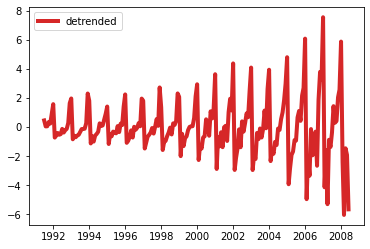

In [19]:
plt.plot(detrended,color='tab:red',linewidth=4,label='detrended')
# plt.plot(df,color='blue',label='orig')
plt.legend()